In [58]:
from Bio import SeqIO
from Bio import AlignIO

In [59]:
id = []
sequence = []
with open("HIV_env_pep.aln") as handle:
    for seq in SeqIO.parse(handle, "fasta"):
        id.append(seq.id)
        sequence.append(str(seq.seq))

In [60]:
import pandas as pd
df = pd.DataFrame(list(zip(id,sequence)), columns = ["ID", "sequence"])
df["sequence"] = df["sequence"].str.strip()
df["sequence_posrich"] = df["sequence"].str.replace('-','W')
df["sequence"] = df["sequence"].str.replace('-','')
df

,ID,sequence,sequence_posrich
0,EU308561.1,MRVKEKYQHLWRWGWRWGTMLLGMLMICSATEKLWVTVYYGVPVWR...,MRVKWWWEKYQHLWRWGWRWGWTMLLGMLMICSATEKLWVTVYYGV...
1,EU308562.1,MRVKEKYQHLWRWGWRWGTMLLGMLMICSATEKLWVTVYYGVPVWR...,MRVKWWWEKYQHLWRWGWRWGWTMLLGMLMICSATEKLWVTVYYGV...
2,EU308541.1,MRVKEKYQHLWRWGWRWGTMLLGMLMICSATEKLWVTVYYGVPVWK...,MRVKWWWEKYQHLWRWGWRWGWTMLLGMLMICSATEKLWVTVYYGV...
3,EU308543.1,MRVKEKYQHLWRWGWRWGTMLLGMLMICSATEKLWVTVYYGVPVWK...,MRVKWWWEKYQHLWRWGWRWGWTMLLGMLMICSATEKLWVTVYYGV...
4,EU308555.1,MRVKEKYQHLWRWGWRWGTMLLGMLMICSATEKLWVTVYYGVPVWK...,MRVKWWWEKYQHLWRWGWRWGWTMLLGMLMICSATEKLWVTVYYGV...
...,...,...,...
82,DQ976412.1,MRVMGIMRNYQHLWKWGTMMLLGILMICNARENLWVTVYYGVPVWK...,MRVMGIMRNYQHLWWWWWKWGTMMLLGILMICNARENLWVTVYYGV...
83,DQ976413.1,MRVMGIMRNYQHLWKWGTMMLLGILMICNARENLWVTVYYGVPVWK...,MRVMGIMRNYQHLWWWWWKWGTMMLLGILMICNARENLWVTVYYGV...
84,DQ976416.1,MRVTEIMRNCQNLWKWGTMMLLGILIICNAKEKLWVTVYYGVPVWK...,MRVTEIMRNCQNLWWWWWKWGTMMLLGILIICNAKEKLWVTVYYGV...
85,DQ976417.1,MRVMGIMRNYQHLWKWGTMMLLGILMICNARENLWVTVYYGVPVWK...,MRVMGIMRNYQHLWWWWWKWGTMMLLGILMICNARENLWVTVYYGV...


In [61]:
xlsx_labels = pd.read_excel("/Users/waynelam/Desktop/WayneLab/HIVClassifier/CellularTropismProject_Master.xlsx", sheet_name=1)
xlsx_labels.drop(["M_tropism_level","Lily_notes"],axis=1,inplace=True)
xlsx_labels["seq"] = xlsx_labels["seq"].str.strip()
xlsx_labels

,seq,Wayne_rank
0,JN002049.1,Non
1,JN002030.1,Non
2,JN002033.1,Non
3,JN002040.1,Non
4,JN002043.1,Non
...,...,...
82,DQ976419.1,Non
83,DQ976420.1,Non
84,DQ976426.1,M-tropic
85,DQ976428.1,M-tropic


In [62]:
df_merged = df.merge(xlsx_labels, how="right", left_on="ID", right_on="seq")

In [63]:
duplicates = df_merged["sequence"].duplicated(keep=False)
for i in range(len(duplicates)):
    if(duplicates[i]):
        print(df_merged["ID"][i], df_merged["sequence"][i])

DQ976381.1 MRVKGIRKSYQHLWRWGTMLHGILMICSATENLWVTVYYGVPVWKEATTTLFCASDAKAYDTEVHNVWATHACVPTDPNPQEVELENVTENFNMWKNNMVEQMHEDIISLWDQSLKPCVRLTPLCVILNCTDLKNDTTTTSGGGGIMMEKGEIKNCSFSINTRGRNKEQKDYAFFYKLDVVPINNNNSYRLISCNTSVITQACPKVSFEPIPIHYCAPAGFAILKCKDKKFNGTGPCKNVSTVQCTHGIRPVVSTQLLLNGSLAEEEVVIRSANFSDNTKTIMVQLKEAVEINCTRPNNNTRKSIPMGPGKAFYTTGEIIGDIRQAHCNLSITKWNNTLKQIVEKLREQFENKTIIFNQSAGGDPEIVMHSFNCGGEFFYCNSTQLFNSTWSSNSTWNDTQGSNNPEGNDTITLTCRIKQFINMWQEVGKAMYAPPISGQIRCSSNITGLLLTRDGGTNEISNQTEIFRPGGGDMRDNWRSELYKYKVVKIEPLGVAPTKAKRRVVQREKRAAVGLGAVFLGFLGAAGSTMGAASITLTAQARQLLSGIVQQQNNLLRAIEAQQHLLQLTVWGIKQLQARVLAVERYLKDQQLLGIWGCSGKLICTTTVPWNASWSNKSLDKIWNNMTWMEWEREINNYTSLIYNLIEESQNQQEKNEQELLELDKWASLWNWFDITQWLWYIRIFIMIVGGLIGLRIVFAVLSIVNRVRQGYSPLSFQTRFPAPRGPDRPGGTEEEGGERDRDRSGRLVNGFLALIWDDLRSLCLFSYHRLRDLLLIVTRIVELLGRRGWEALKYWGNLLQYWSQELKNSAVSLLNVTAIAVAEGTDRVIEVLQRAFRAILHIPRRIRQGLERALL
DQ976385.1 MRVKGIRKSYQHLWRWGTMLHGILMICSATENLWVTVYYGVPVWKEATTTLFCASDAKAYDTEVHNVWATHACVPTDPNPQEVELENVTENFNMWKNNMVEQMHEDIISLWDQSLKPCVR

In [64]:
df_merged.drop('seq', axis=1, inplace=True)
df_merged.rename(columns={"Wayne_rank":"tropism"}, inplace=True)

In [65]:
df_merged

,ID,sequence,sequence_posrich,tropism
0,JN002049.1,MRVKEKYQHLWRWGWRWGTMLLGMLMICSATEKLWVTVYYGVPVWK...,MRVKWWWEKYQHLWRWGWRWGWTMLLGMLMICSATEKLWVTVYYGV...,Non
1,JN002030.1,MRVKEKYQHLWRWGWRWGTMLLGMLMICSATEKLWVTVYYGVPVWK...,MRVKWWWEKYQHLWRWGWRWGWTMLLGMLMICSATEKLWVTVYYGV...,Non
2,JN002033.1,MRVKEKYQHLWRWGWRWGTMLLGMLMICSATEKLWVTVYYGVPVWK...,MRVKWWWEKYQHLWRWGWRWGWTMLLGMLMICSATEKLWVTVYYGV...,Non
3,JN002040.1,MRVKEKYQHLWRWGWRWGTMLLGMLMICSATEKLWVTVYYGVPVWK...,MRVKWWWEKYQHLWRWGWRWGWTMLLGMLMICSATEKLWVTVYYGV...,Non
4,JN002043.1,MRVKEKYQHLWRWGWRWGTMLLGMLMICSATEKLWVTVYYGVPVWK...,MRVKWWWEKYQHLWRWGWRWGWTMLLGMLMICSATEKLWVTVYYGV...,Non
...,...,...,...,...
82,DQ976419.1,MRVTGIMRSYQNLWIWGTMMLLGIFMICNANLWVTVYYGVPVWKEA...,MRVTGIMRSYQNLWWWWWIWGTMMLLGIFMICNAWWNLWVTVYYGV...,Non
83,DQ976420.1,MRVTGIMRSYQNLWIWSTMMLLGIFMICNANLWVTVYYGVPVWKEA...,MRVTGIMRSYQNLWWWWWIWSTMMLLGIFMICNAWWNLWVTVYYGV...,Non
84,DQ976426.1,MRVMGIRKNYQHLWKWGMMLLGMLMICNVAGNLWVTVYYGVPVWKE...,MRVMGIRKNYQHLWWWWWKWGWMMLLGMLMICNVAGNLWVTVYYGV...,M-tropic
85,DQ976428.1,MRVMGIRKNYQHLWKWGMMLLGMLMICNVAGNLWATVYYGVPVWKE...,MRVMGIRKNYQHLWWWWWKWGWMMLLGMLMICNVAGNLWATVYYGV...,M-tropic


In [66]:
df_merged.describe()

,ID,sequence,sequence_posrich,tropism
count,87,87,87,87
unique,87,83,83,2
top,JN002049.1,MRVKGIRKSYQHLWRWGTMLHGILMICSATENLWVTVYYGVPVWKE...,MRVKGIRKSYQHLWWWWWRWGWTMLHGILMICSATENLWVTVYYGV...,M-tropic
freq,1,5,5,60


In [10]:
for i in df_merged["sequence"][:10]:
    print(len(i))

851
854
853
854
853
848
850
851
850
850


In [11]:
for i in df_merged["sequence_posrich"][:10]:
    print(len(i))

899
899
899
899
899
899
899
899
899
899


In [12]:
from protlearn.features import length, aac , aaindex1, ngram, entropy, posrich, motif, atc, binary, cksaap, ctd, ctdc, ctdt, ctdd, moreau_broto, moran, geary, paac, apaac, socn, qso
import numpy as np

In [13]:
from sklearn.model_selection import train_test_split
tropic_column = df_merged["tropism"]
train_df, test_df = train_test_split(df_merged, test_size=0.2, random_state=42, stratify = tropic_column)

In [14]:
train_df.describe()

,ID,sequence,sequence_posrich,tropism
count,69,69,69,69
unique,69,65,65,2
top,EU308547.1,MRVKGIRKSYQHLWRWGTMLHGILMICSATENLWVTVYYGVPVWKE...,MRVKGIRKSYQHLWWWWWRWGWTMLHGILMICSATENLWVTVYYGV...,M-tropic
freq,1,5,5,48


In [15]:
test_df.describe()

,ID,sequence,sequence_posrich,tropism
count,18,18,18,18
unique,18,18,18,2
top,DQ976430.1,MRVMGIRKNYQHLWKWGMMLLGMLMICNVAGNLWVTVYYGVPVWKE...,MRVMGIRKNYQHLWWWWWKWGWMMLLGMLMICNVAGNLWVTVYYGV...,M-tropic
freq,1,1,1,12


In [16]:
seqs = list(train_df["sequence"])
s_posrich = list(train_df["sequence_posrich"])

In [17]:
seq_length = length(seqs, method = 'int')

In [18]:
seq_aac = aac(seqs)

In [19]:
seq_aaindex1 = aaindex1(seqs)

In [20]:
seq_ngram = ngram(seqs, n=2)

In [21]:
seq_entropy = entropy(seqs)

In [22]:
pos1 = posrich(s_posrich, position=419, aminoacid='D').reshape(-1,1)

In [23]:
pos2 = posrich(s_posrich, position=89, aminoacid='K').reshape(-1,1)

In [24]:
pos3 = posrich(s_posrich, position=361, aminoacid='Q').reshape(-1,1)

In [25]:
pos4 = posrich(s_posrich, position=368, aminoacid='R').reshape(-1,1)

In [26]:
pos5 = posrich(s_posrich, position=471, aminoacid='K').reshape(-1,1)

In [27]:
pos6 = posrich(s_posrich, position=481, aminoacid='Q').reshape(-1,1)

In [28]:
pos7 = posrich(s_posrich, position=482, aminoacid='I').reshape(-1,1)

In [29]:
pos8 = posrich(s_posrich, position=315, aminoacid='N').reshape(-1,1)

In [30]:
seq_atc = atc(seqs)

In [31]:
seq_cksaap = cksaap(seqs)

In [32]:
seq_ctd = ctd(seqs)

In [33]:
seq_ctdc = ctdc(seqs)

In [34]:
seq_ctdt = ctdt(seqs)

In [35]:
seq_ctdd = ctdd(seqs)

In [36]:
mb = moreau_broto(seqs)

In [37]:
seq_moran = moran(seqs)

In [38]:
extracted_features_train = np.concatenate([seq_length, seq_aac[0], seq_aaindex1[0], seq_ngram[0], seq_entropy, seq_atc[0], seq_atc[1], seq_cksaap[0], seq_ctd[0], seq_ctdc[0], seq_ctdt[0], seq_ctdd[0], mb, seq_moran, pos1, pos2, pos3, pos4, pos5, pos6, pos7, pos8], axis=1)

In [39]:
np.shape(extracted_features_train)

(69, 2023)

In [40]:
labels_train = train_df["tropism"]

In [41]:
np.shape(labels_train)

(69,)

In [42]:
from protlearn.features import length, aac , aaindex1, ngram, entropy, posrich, motif, atc, binary, cksaap, ctd, ctdc, ctdt, ctdd, moreau_broto, moran, geary, paac, apaac, socn, qso

In [43]:
test_seqs = list(test_df["sequence"])
test_seqs_posrich = list(test_df["sequence_posrich"])

In [44]:
t_length = length(test_seqs, method = 'int')
t_aac = aac(test_seqs)
t_aaindex1 = aaindex1(test_seqs)
t_ngram = ngram(test_seqs, n=2)
t_entropy = entropy(test_seqs)
t_pos1 = posrich(test_seqs_posrich, position=419, aminoacid='D').reshape(-1,1)
t_pos2 = posrich(test_seqs_posrich, position=89, aminoacid='K').reshape(-1,1)
t_pos3 = posrich(test_seqs_posrich, position=361, aminoacid='Q').reshape(-1,1)
t_pos4 = posrich(test_seqs_posrich, position=368, aminoacid='R').reshape(-1,1)
t_pos5 = posrich(test_seqs_posrich, position=471, aminoacid='K').reshape(-1,1)
t_pos6 = posrich(test_seqs_posrich, position=481, aminoacid='Q').reshape(-1,1)
t_pos7 = posrich(test_seqs_posrich, position=482, aminoacid='I').reshape(-1,1)
t_pos8 = posrich(test_seqs_posrich, position=315, aminoacid='N').reshape(-1,1)
t_atc = atc(test_seqs)
t_cksaap = cksaap(test_seqs)
t_ctd = ctd(test_seqs)
t_ctdc = ctdc(test_seqs)
t_ctdt = ctdt(test_seqs)
t_ctdd = ctdd(test_seqs)
t_mb = moreau_broto(test_seqs)
t_moran = moran(test_seqs)

In [45]:
# Print the shapes of individual arrays
print("Shape of Length array:", t_length.shape)
print("Shape of AAC array:", t_aac[0].shape)
print("Shape of Aaindex1 array:", t_aaindex1[0].shape)
# ... Continue this pattern for all other arrays ...
print("Shape of Ngram array:", t_ngram[0].shape)
print("Shape of Entropy array:", t_entropy.shape)
print("Shape of Atom array:", t_atc[0].shape)
print("Shape of Bond array:", t_atc[1].shape)
#print("Shape of Binary array:", t_binary.shape)
print("Shape of CKSAAP array:", t_cksaap[0].shape)
print("Shape of CTD array:", t_ctd[0].shape)
print("Shape of CTDC array:", t_ctdc[0].shape)
print("Shape of CTDT array:", t_ctdt[0].shape)
print("Shape of CTDD array:", t_ctdd[0].shape)
print("Shape of MB array:", t_mb.shape)
print("Shape of Moran array:", t_moran.shape)

Shape of Length array: (18, 1)
Shape of AAC array: (18, 20)
Shape of Aaindex1 array: (18, 553)
Shape of Ngram array: (18, 400)
Shape of Entropy array: (18, 1)
Shape of Atom array: (18, 5)
Shape of Bond array: (18, 3)
Shape of CKSAAP array: (18, 400)
Shape of CTD array: (18, 343)
Shape of CTDC array: (18, 39)
Shape of CTDT array: (18, 39)
Shape of CTDD array: (18, 195)
Shape of MB array: (18, 8)
Shape of Moran array: (18, 8)


In [46]:
extracted_features_test = np.concatenate([t_length, t_aac[0], t_aaindex1[0], t_ngram[0], t_entropy, t_atc[0], t_atc[1], t_cksaap[0], t_ctd[0], t_ctdc[0], t_ctdt[0], t_ctdd[0], t_mb, t_moran, t_pos1, t_pos2, t_pos3, t_pos4, t_pos5, t_pos6, t_pos7, t_pos8], axis=1)

In [47]:
np.shape(extracted_features_test)

(18, 2023)

In [48]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
label_encoder = OneHotEncoder(handle_unknown='ignore')

In [49]:
np.shape(labels_train.values.reshape(-1,1))

(69, 1)

In [50]:
encoded_labels_train = label_encoder.fit_transform(labels_train.values.reshape(-1,1))

In [51]:
labels_test = test_df["tropism"]
encoded_labels_test = label_encoder.transform(labels_test.values.reshape(-1,1))

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Assuming extracted_features, label are your training data and t_extracted_features, t_label are your test data

# Initialize Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Define parameter grid for grid search
param_grid = {'n_estimators': [33, 34, 35, 36, 37, 38, 39]}  # You can add more values

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

# Train the model
grid_search.fit(extracted_features_train, encoded_labels_train.toarray()) 

# Get the best estimator from the grid search
best_rf_classifier = grid_search.best_estimator_

# Predictions on training set
train_predictions = best_rf_classifier.predict(extracted_features_train)

# Predictions on test set
test_predictions = best_rf_classifier.predict(extracted_features_test)

# Evaluate metrics for training set
train_accuracy = accuracy_score(encoded_labels_train.toarray() , train_predictions)

train_precision = precision_score(encoded_labels_train.toarray(), train_predictions, average='weighted')
train_recall = recall_score(encoded_labels_train.toarray(), train_predictions, average='weighted')
train_f1 = f1_score(encoded_labels_train.toarray(), train_predictions, average='weighted')

# Evaluate metrics for test set
test_accuracy = accuracy_score(encoded_labels_test.toarray(), test_predictions)
test_precision = precision_score(encoded_labels_test.toarray(), test_predictions, average='weighted')
test_recall = recall_score(encoded_labels_test.toarray(), test_predictions, average='weighted')
test_f1 = f1_score(encoded_labels_test.toarray(), test_predictions, average='weighted')

# Print results
print("Best Number of Trees:", best_rf_classifier.n_estimators)
print("Training Set Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")

print("\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")

Best Number of Trees: 35
Training Set Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Test Set Metrics:
Accuracy: 0.9444
Precision: 0.9487
Recall: 0.9444
F1 Score: 0.9430


In [52]:
from tabulate import tabulate

results = [
    ["Metric", "Train", "Test"],
    ["Accuracy", train_accuracy, test_accuracy],
    ["Precision", train_precision, test_precision],
    ["Recall", train_recall, test_recall],
    ["F1 Score", train_f1, test_f1]
]

table = tabulate(results, headers="firstrow", tablefmt="fancy_grid")
print(table)


╒═══════════╤═════════╤══════════╕
│ Metric    │   Train │     Test │
╞═══════════╪═════════╪══════════╡
│ Accuracy  │       1 │ 0.944444 │
├───────────┼─────────┼──────────┤
│ Precision │       1 │ 0.948718 │
├───────────┼─────────┼──────────┤
│ Recall    │       1 │ 0.944444 │
├───────────┼─────────┼──────────┤
│ F1 Score  │       1 │ 0.94303  │
╘═══════════╧═════════╧══════════╛


In [53]:
best_rf_classifier = grid_search.best_estimator_
feature_importances = best_rf_classifier.feature_importances_

In [54]:
sorted_indices = np.argsort(feature_importances)

# Get the last 10 indices (10 largest values)
top_10 = sorted_indices[-10:]
print(top_10)

[ 241 1469 1812  258  440  407  144  290  279  862]


In [55]:
# Print the shapes of individual arrays
print("Shape of Length array:", t_length.shape)
print("Shape of AAC array:", t_aac[0].shape)
print("Shape of Aaindex1 array:", t_aaindex1[0].shape)
# ... Continue this pattern for all other arrays ...
print("Shape of Ngram array:", t_ngram[0].shape)
print("Shape of Entropy array:", t_entropy.shape)
print("Shape of Atom array:", t_atc[0].shape)
print("Shape of Bond array:", t_atc[1].shape)
#print("Shape of Binary array:", t_binary.shape)
print("Shape of CKSAAP array:", t_cksaap[0].shape)
print("Shape of CTD array:", t_ctd[0].shape)
print("Shape of CTDC array:", t_ctdc[0].shape)
print("Shape of CTDT array:", t_ctdt[0].shape)
print("Shape of CTDD array:", t_ctdd[0].shape)
print("Shape of MB array:", t_mb.shape)
print("Shape of Moran array:", t_moran.shape)

Shape of Length array: (18, 1)
Shape of AAC array: (18, 20)
Shape of Aaindex1 array: (18, 553)
Shape of Ngram array: (18, 400)
Shape of Entropy array: (18, 1)
Shape of Atom array: (18, 5)
Shape of Bond array: (18, 3)
Shape of CKSAAP array: (18, 400)
Shape of CTD array: (18, 343)
Shape of CTDC array: (18, 39)
Shape of CTDT array: (18, 39)
Shape of CTDD array: (18, 195)
Shape of MB array: (18, 8)
Shape of Moran array: (18, 8)


In [56]:
feature_categories = ['length', 'aac', 'aaindex1', 'ngram', 'entropy', 'atom', 'bond', 'cksaap', 'ctd', 'ctdc', 'ctdt', 'ctdd', 'mb', 'moran', 'pos1', 'pos2', 'pos3', 'pos4', 'pos5', 'pos6', 'pos7']
mb_columns = np.array(["mb[0]", "mb[1]", "mb[2]", "mb[3]", "mb[4]", "mb[5]", "mb[6]","mb[7]"])
moran_columns = np.array(["moran[0]", "moran[1]", "moran[2]", "moran[3]", "moran[4]", "moran[5]", "moran[6]","moran[7]"])
atc_atoms_columns = np.array(["C", "H", "N", "O", "S"])
atc_bonds_columns = np.array(["total bonds", "single bonds", "double bonds"])
feature_names = np.concatenate([np.array(["length"]), list(seq_aac[1]), seq_aaindex1[1], seq_ngram[1], np.array(["entropy"]), atc_atoms_columns, atc_bonds_columns, seq_cksaap[1], seq_ctd[1], seq_ctdc[1], seq_ctdt[1], seq_ctdd[1], mb_columns, moran_columns, np.array(["pos1", "pos2", "pos3", "pos4", "pos5", "pos6", "pos7"])])
for index in top_10:
    sum = index
    counter = 0
    arrays = [seq_length, seq_aac[0], seq_aaindex1[0], seq_ngram[0], seq_entropy, seq_atc[0], seq_atc[1], seq_cksaap[0], seq_ctd[0], seq_ctdc[0], seq_ctdt[0], seq_ctdd[0], mb, seq_moran, pos1, pos2, pos3, pos4, pos5, pos6, pos7]
    while sum>=0:
        sum -= len(arrays[counter][1])
        counter+=1
    sum += len(arrays[(counter-1)][1])
    print(feature_categories[counter-1], feature_names[index], sum)
    #feature category, feature name, column in feature category

aaindex1 OOBM850104 220
ctd 263 86
ctdd Hydrophobicity_ARGP820101-G2D75 8
aaindex1 PALJ810116 237
aaindex1 AURR980118 419
aaindex1 WERD780104 386
aaindex1 ISOY800106 123
aaindex1 QIAN880113 269
aaindex1 QIAN880102 258
ngram RK 288


NameError: name 'top_10' is not defined

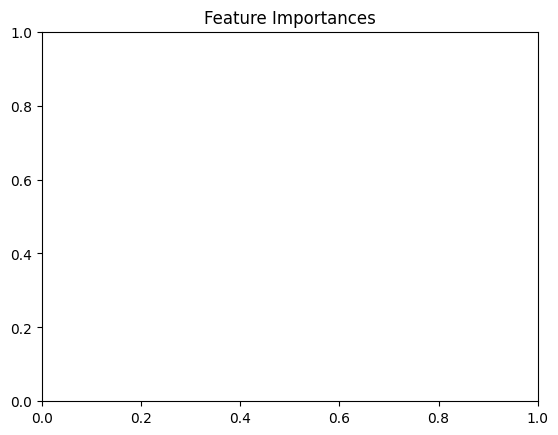

In [98]:
import matplotlib.pyplot as plt
plt.title('Feature Importances')
plt.barh(range(len(top_10)), feature_importances[top_10], color='b', align='center')
plt.yticks(range(len(top_10)), [feature_names[i] for i in top_10])
plt.xlabel('Relative Importance')
plt.show()

In [78]:
first_feature = np.concatenate((seq_ngram[0][:,288], t_ngram[0][:,288]))

In [79]:
tropism_col = np.concatenate((train_df["tropism"], test_df["tropism"]))

In [80]:
feature_df1 = pd.DataFrame({"feature": first_feature, "tropism": tropism_col})

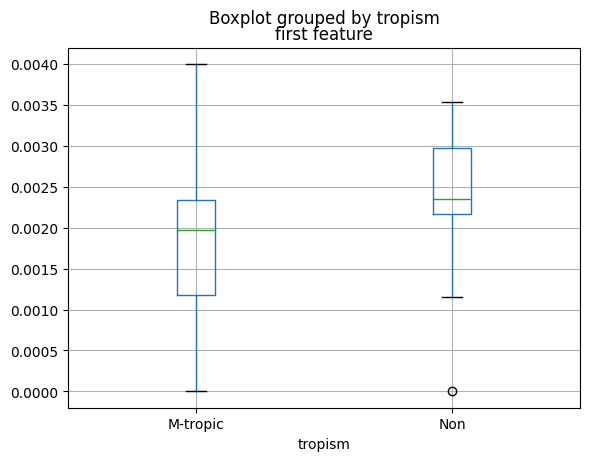

In [81]:
feature_df1.boxplot(column = "feature", by = "tropism")
plt.title('first feature')
plt.show()

In [82]:
mtropic1, nontropic1 = feature_df1.query("tropism == 'M-tropic'")["feature"], feature_df1.query("tropism == 'Non'")["feature"]

In [83]:
print(len(mtropic1), len(nontropic1))

60 27


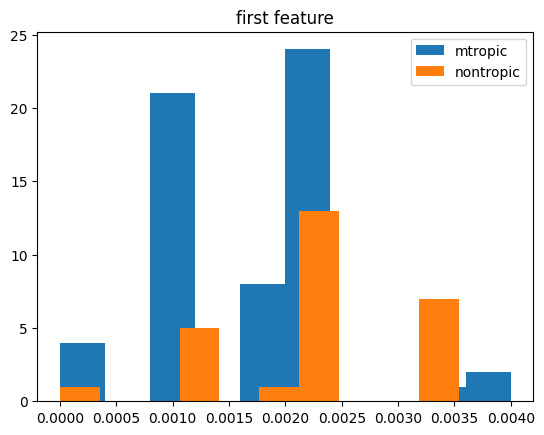

In [84]:
plt.hist(mtropic1, label='mtropic')
plt.hist(nontropic1, label='nontropic')
plt.title('first feature')
plt.legend()

In [85]:
import scipy.stats as stats
stats.ttest_ind(a=mtropic1, b=nontropic1, random_state=42)

Ttest_indResult(statistic=-2.6987868702766935, pvalue=0.008393881020892635)

In [86]:
second_feature = np.concatenate((seq_aaindex1[0][:,258], t_aaindex1[0][:,258]))
tropic_col2 = np.concatenate((train_df["tropism"], test_df["tropism"]))

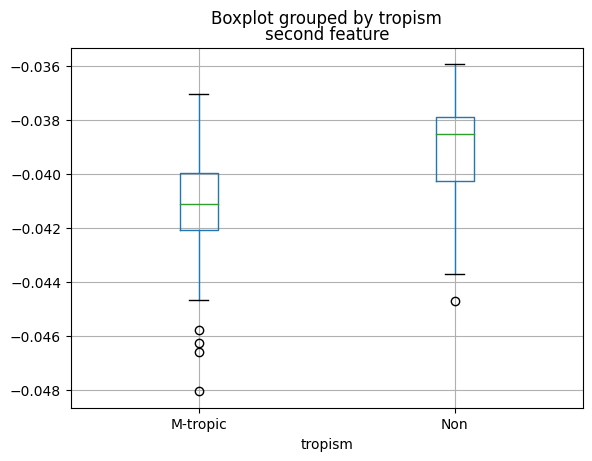

In [87]:
feature_df2 = pd.DataFrame({"feature": second_feature, "tropism": tropic_col2})
feature_df2.boxplot(column = "feature", by = "tropism")
plt.title('second feature')
plt.show()

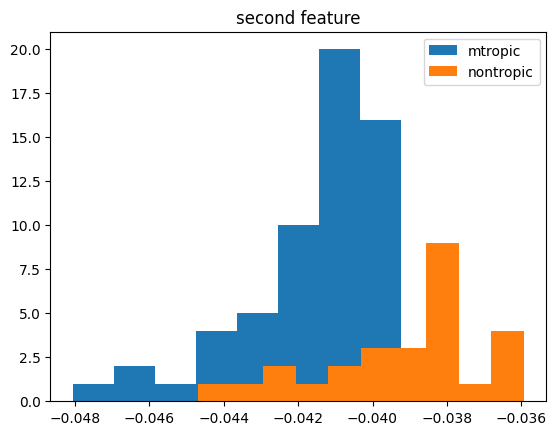

In [88]:
mtropic2, nontropic2 = feature_df2.query("tropism == 'M-tropic'")["feature"], feature_df2.query("tropism == 'Non'")["feature"]
plt.hist(mtropic2, label='mtropic')
plt.hist(nontropic2, label='nontropic')
plt.title('second feature')
plt.legend()

In [89]:
import scipy.stats as stats
stats.ttest_ind(a=mtropic2, b=nontropic2, random_state=42)

Ttest_indResult(statistic=-4.68686179890498, pvalue=1.045614807837129e-05)

In [90]:
third_feature = np.concatenate((seq_aaindex1[0][:,269], t_aaindex1[0][:,269]))
tropic_col3 = np.concatenate((train_df["tropism"], test_df["tropism"]))

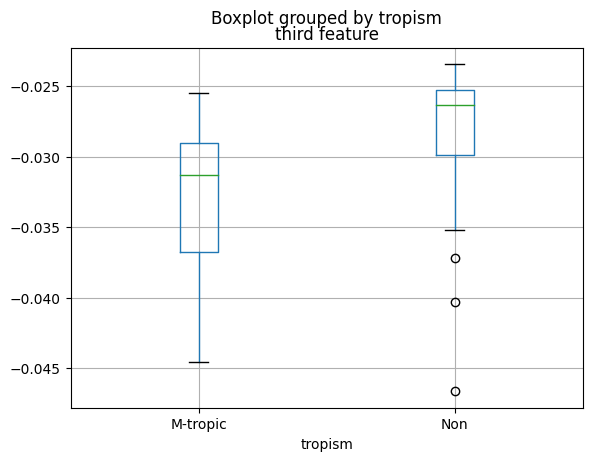

In [91]:
feature_df3 = pd.DataFrame({"feature": third_feature, "tropism": tropic_col3})
feature_df3.boxplot(column = "feature", by = "tropism")
plt.title('third feature')
plt.show()

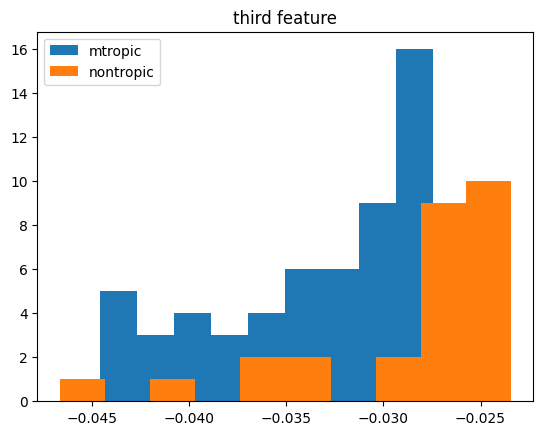

In [92]:
mtropic3, nontropic3 = feature_df3.query("tropism == 'M-tropic'")["feature"], feature_df3.query("tropism == 'Non'")["feature"]
plt.hist(mtropic3, label='mtropic')
plt.hist(nontropic3, label='nontropic')
plt.title('third feature')
plt.legend()

In [93]:
import scipy.stats as stats
stats.ttest_ind(a=mtropic3, b=nontropic3, random_state=42)

Ttest_indResult(statistic=-3.7928329964991097, pvalue=0.00027796737080887905)

In [94]:
#validate Thomas et al
thomas = np.concatenate((pos7.flatten().astype(int).tolist(), t_pos7.flatten().astype(int).tolist()))
tropic_col_thomas = np.concatenate((train_df["tropism"], test_df["tropism"]))

In [95]:
feature_df4 = pd.DataFrame({"feature": thomas, "tropism": tropic_col_thomas})

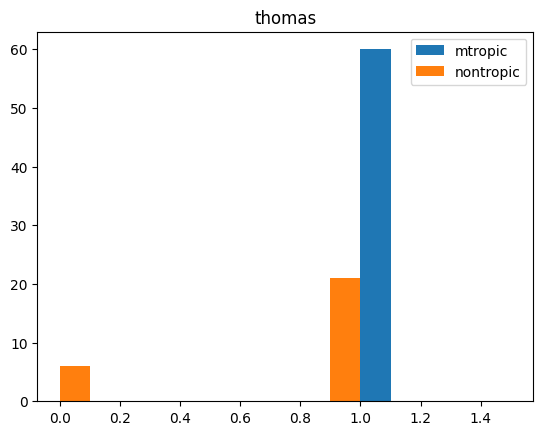

In [96]:
mtropic4, nontropic4 = feature_df4.query("tropism == 'M-tropic'")["feature"], feature_df4.query("tropism == 'Non'")["feature"]
plt.hist(mtropic4, label='mtropic')
plt.hist(nontropic4, label='nontropic')
plt.title('thomas')
plt.legend()

In [99]:
import scipy.stats as stats
stats.ttest_ind(a=mtropic4, b=nontropic4, random_state=42)

/var/folders/p5/2f9dnzr14y90dpvlgqwnchr80000gn/T/ipykernel_676/217942215.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stats.ttest_ind(a=mtropic4, b=nontropic4, random_state=42)


Ttest_indResult(statistic=4.092525928189875, pvalue=9.673415168918449e-05)